In [1]:
from pyteomics import mgf
import random
import pickle
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.max_columns = None
random.seed(0)

#Reading MGF file, selecting 10 random (non-Decoy)
mg = {}
count = 0
with mgf.read('human.faims.fixed.decoy.mgf') as reader:
    for spectrum in reader:
        if count % 10000 == 0:
            print(count)
        count += 1
        if ('DECOY' not in spectrum['params']['title']) and (not bool(re.match("\+\d+\.\d+",spectrum['params']['seq']))):
            mg[spectrum['params']['title']] = spectrum
cond = random.sample(list(mg.keys()), 10)
mg2 = {}
for x in cond: mg2[x] = mg[x]

print(mg2.keys())
with open('mgf_condensed.pkl','wb') as f:
    pickle.dump(mg2,f)
for i in mg2:
    print(mg2[i]['params']['seq'])


#Loading in condensed MGF
with open('mgf_condensed.pkl','rb') as f:
    mg = pickle.load(f)



#Reading big TRAML file, writing small TRAML file
seqs = []
charges = []
for key in mg:
    seqs.append(mg[key]['params']['seq'])
    charges.append(int(mg[key]['params']['charge'][0]))
ts = pd.read_csv("human_5peaks_noloss_400to2000_pt2mz.tsv", sep='\t')
ts2 = ts[ts['FullUniModPeptideName'].isin(seqs) ]
#ts2.to_csv('condensed_seq.csv')
#ts2 = pd.read_csv('condensed_seq.csv')
temp = [ts2[ts2['FullUniModPeptideName'] == x] for x in seqs]
temp = [ temp[i][ temp[i]['PrecursorCharge'] == charges[i] ] for i in range(len(temp))]

ts3 = pd.concat(temp)

ts3.to_csv('condensed.csv')


#Reading small TRAML file
ts = pd.read_csv("condensed.csv")

all_comps = []
for x in mg:
    seq = mg[x]['params']['seq']
    print(seq)
    mgf_mzs = mg[x]['m/z array']
    mgf_intensities = mg[x]['intensity array']
    mgf_mzs, mgf_intensities = zip(*sorted(zip(mgf_mzs, mgf_intensities)))
    ts2 = ts[ts['FullUniModPeptideName']==seq]
    if len(ts2) == 0:
        continue
    tsv_mzs = ts2['ProductMz'].values.tolist()
    tsv_mzs = [ round(y,3) for y in tsv_mzs ]
    tsv_intensities = ts2['LibraryIntensity'].values.tolist()
    max_tsv_intensities = max(tsv_intensities)
    tsv_intensities = [ (x/max_tsv_intensities) for x in tsv_intensities ]
    tsv_intensities = [ round(y,1) for y in tsv_intensities ]

    max_intensities = max(mgf_intensities)
    mgf_intensities = [ (x/max_intensities) for x in mgf_intensities ]
    mgf_intensities = [ round(y,1) for y in mgf_intensities ]

    tsv_mzs, tsv_intensities = zip(*sorted(zip(tsv_mzs, tsv_intensities)))
    indices = sorted(range(len(mgf_intensities)), key=lambda i: mgf_intensities[i])[-20:]
    
    mgf_mzs_top = [mgf_mzs[i] for i in indices]
    mgf_intensities_top = [mgf_intensities[i] for i in indices]
    mgf_mzs_top, mgf_intensities_top = zip(*sorted(zip(mgf_mzs_top, mgf_intensities_top)))

    mgf_mzs_bottom = [mgf_mzs[i] for i in range(len(mgf_mzs)) if i not in indices ]
    mgf_intensities_bottom = [mgf_intensities[i] for i in range(len(mgf_mzs)) if i not in indices]
    
    
    mgf_df_top = pd.DataFrame(columns=mgf_mzs_top)
    mgf_df_top.loc[0] = mgf_intensities_top
    mgf_df_bottom = pd.DataFrame(columns=mgf_mzs_bottom)
    mgf_df_bottom.loc[0] = mgf_intensities_bottom
    tsv_df = pd.DataFrame(columns=tsv_mzs)
    tsv_df.loc[0] = tsv_intensities

    all_comps.append( [mgf_df_top,mgf_df_bottom,tsv_df] )
'''
    #Make this a visual - is the shape the same on a graph?
    # as a bonus, you could probably calculate the cosine similarity to get a numeric representation
    print(seq)
    print('mgf length: ' + str(len(mgf_mzs)))
    print('tsv length: ' + str(len(tsv_mzs)))
    print('mzs:')
    print(mgf_mzs)
    print(tsv_mzs)
    print('intensities:')
    print(mgf_intensities)
    print(tsv_intensities)
    print()
'''
# Graph
def plot_spec(SPECTRA, COLOR):
    plt.vlines(SPECTRA.columns, np.repeat(0, len(SPECTRA.columns)), SPECTRA, colors=COLOR)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
dict_keys(['human.faims.111074.111074. File:"", NativeID:"scan=111074" Retention Time: 1861.992', 'human.faims.50656.50656. File:"", NativeID:"scan=50656" Retention Time: 1545.96', 'human.faims.99702.99702. File:"", NativeID:"scan=99702" Retention Time: 1273.302', 'human.faims.117100.117100. File:"", NativeID:"scan=117100" Retention Time: 2223.93', 'human.faims.55301.55301. File:"", NativeID:"scan=55301" Retention Time: 2303.412', 'human.faims.5324.5324. File:"", NativeID:"scan=5324" Retention Time: 2612.37', 'human.faims.34033.34033. File:"", NativeID:"scan=34033" Retention Time: 2915.91', 'human.faims.126997.126997. File:"", NativeID:"scan=126997" Retention Time: 2440.482', 'human.faims.67255.67255. File:"", NativeID:"scan=67255" Retention Time: 2359.458', 'human.faims.63920.63920. File:"", NativeID:"scan=63920"

In [18]:
cond

['human.faims.111074.111074. File:"", NativeID:"scan=111074" Retention Time: 1861.992',
 'human.faims.50656.50656. File:"", NativeID:"scan=50656" Retention Time: 1545.96',
 'human.faims.99702.99702. File:"", NativeID:"scan=99702" Retention Time: 1273.302',
 'human.faims.117100.117100. File:"", NativeID:"scan=117100" Retention Time: 2223.93',
 'human.faims.55301.55301. File:"", NativeID:"scan=55301" Retention Time: 2303.412',
 'human.faims.5324.5324. File:"", NativeID:"scan=5324" Retention Time: 2612.37',
 'human.faims.34033.34033. File:"", NativeID:"scan=34033" Retention Time: 2915.91',
 'human.faims.126997.126997. File:"", NativeID:"scan=126997" Retention Time: 2440.482',
 'human.faims.67255.67255. File:"", NativeID:"scan=67255" Retention Time: 2359.458',
 'human.faims.63920.63920. File:"", NativeID:"scan=63920" Retention Time: 1573.038']

In [47]:
from timeit import default_timer as timer
from datetime import timedelta

def mgf_library_upload(fileName):
    #['PrecursorMz','FullUniModPeptideName','PrecursorCharge','ProductMz','LibraryIntensity','transition_group_id','ProteinName', 'Peaks'] #Peaks is a tuple of (mz, intensity, key)
    #['pepmass', 'seq', None, ]
    libMGF = mgf.read(fileName)
    print('#Enter library dictionary upload: ')
    print('#'+str(timedelta(seconds=timer())))
    libDict = {}
    for spec in libMGF:
#        print(spec)

        key = (spec['params']['pepmass'][0], spec['params']['seq'])
        charge = spec['params']['charge'][0]
        name = spec['params']['title']
        if 'protein' in spec['params']: protein = spec['params']['protein']
        else: protein = ''
        mz = spec['m/z array']
        intensity = spec['intensity array']
        intensity = [x**0.5 for x in intensity]
        #print(key)
        keyList = [key for x in mz]
        #print(key)
        #print(keyList)
        peaks = list(tuple(zip(mz,intensity,keyList)))
        peaks.sort(key=lambda x:x[1])
        peaks = peaks[:31]
        peaks.sort(key=lambda x:x[0])
        tempDict = {
            'PrecursorCharge':charge,
            'transition_group_id':name,
            'ProteinName':protein,
            'Peaks':peaks
        }
        libDict[key] = tempDict
        #break
    return libDict

mgf_new = mgf_library_upload("human.faims.fixed.decoy.mgf")

#Enter library dictionary upload: 
#0:19:50.397993


In [32]:
mgf_new_keys = mgf_new.keys()
for key in mgf_new_keys:
    print(key)
    break

(798.93, 'AAAAAAAAAAAAAAAGAGAGAK')


In [33]:
# hack to get the correct key for the first comparison in "cond"
libMGF = mgf.read("human.faims.fixed.decoy.mgf")
pep1key_new = libMGF.get_spectrum(cond[0])['params']['pepmass'][0], libMGF.get_spectrum(cond[0])['params']['seq']

In [46]:
pep1key_new

(643.82, 'TLSSLYSEMQK')

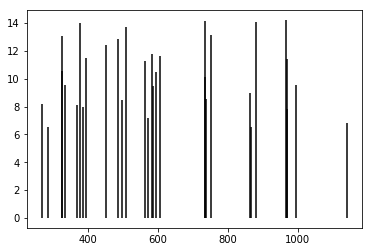

In [41]:
mz1 = [x[0] for x in mgf_new[pep1key_new]['Peaks']]
int1 = [x[1] for x in mgf_new[pep1key_new]['Peaks']]
plt.vlines(mz1, np.repeat(0, len(mz1)), int1)
plt.xlim()

In [ ]:
from timeit import default_timer as timer
from datetime import timedelta

def mgf_library_upload(fileName):
    #['PrecursorMz','FullUniModPeptideName','PrecursorCharge','ProductMz','LibraryIntensity','transition_group_id','ProteinName', 'Peaks'] #Peaks is a tuple of (mz, intensity, key)
    #['pepmass', 'seq', None, ]
    libMGF = mgf.read(fileName)
    print('#Enter library dictionary upload: ')
    print('#'+str(timedelta(seconds=timer())))
    libDict = {}
    for spec in libMGF:
#        print(spec)

        key = (spec['params']['pepmass'][0], spec['params']['seq'])
        charge = spec['params']['charge'][0]
        name = spec['params']['title']
        if 'protein' in spec['params']: protein = spec['params']['protein']
        else: protein = ''
        mz = spec['m/z array']
        intensity = spec['intensity array']
        intensity = [x**0.5 for x in intensity]
        #print(key)
        keyList = [key for x in mz]
        #print(key)
        #print(keyList)
        peaks = list(tuple(zip(mz,intensity,keyList)))
        #peaks.sort(key=lambda x:x[1])
        #peaks = peaks[:31]
        #peaks.sort(key=lambda x:x[0])
        tempDict = {
            'PrecursorCharge':charge,
            'transition_group_id':name,
            'ProteinName':protein,
            'Peaks':peaks
        }
        libDict[key] = tempDict
        #break
    return libDict

mgf_new2 = mgf_library_upload("human.faims.fixed.decoy.mgf")

# should be all peaks without filter (commented out the sort lamba part)

(200, 1300)

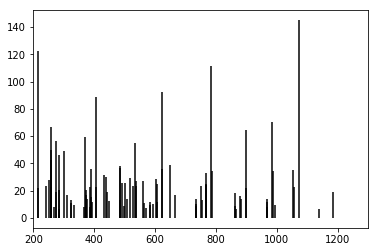

In [50]:
mz1 = [x[0] for x in mgf_new2[pep1key_new]['Peaks']]
int1 = [x[1] for x in mgf_new2[pep1key_new]['Peaks']]
plt.vlines(mz1, np.repeat(0, len(mz1)), int1)
plt.xlim(200,1300)

# your original implementation

(200, 1300)

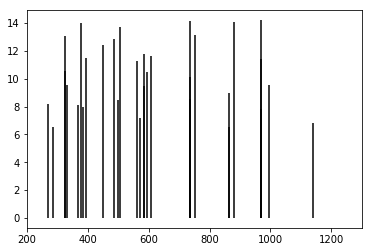

In [51]:
mz1 = [x[0] for x in mgf_new[pep1key_new]['Peaks']]
int1 = [x[1] for x in mgf_new[pep1key_new]['Peaks']]
plt.vlines(mz1, np.repeat(0, len(mz1)), int1)
plt.xlim(200,1300)

In [52]:
def mgf_library_upload(fileName):
    #['PrecursorMz','FullUniModPeptideName','PrecursorCharge','ProductMz','LibraryIntensity','transition_group_id','ProteinName', 'Peaks'] #Peaks is a tuple of (mz, intensity, key)
    #['pepmass', 'seq', None, ]
    libMGF = mgf.read(fileName)
    print('#Enter library dictionary upload: ')
    print('#'+str(timedelta(seconds=timer())))
    libDict = {}
    for spec in libMGF:
#        print(spec)

        key = (spec['params']['pepmass'][0], spec['params']['seq'])
        charge = spec['params']['charge'][0]
        name = spec['params']['title']
        if 'protein' in spec['params']: protein = spec['params']['protein']
        else: protein = ''
        mz = spec['m/z array']
        intensity = spec['intensity array']
        intensity = [x**0.5 for x in intensity]
        #print(key)
        keyList = [key for x in mz]
        #print(key)
        #print(keyList)
        peaks = list(tuple(zip(mz,intensity,keyList)))
        peaks.sort(key=lambda x:x[1])
        peaks = peaks[-31:]
        peaks.sort(key=lambda x:x[0])
        tempDict = {
            'PrecursorCharge':charge,
            'transition_group_id':name,
            'ProteinName':protein,
            'Peaks':peaks
        }
        libDict[key] = tempDict
        #break
    return libDict

mgf_new3 = mgf_library_upload("human.faims.fixed.decoy.mgf")

#Enter library dictionary upload: 
#0:30:22.848275


(200, 1300)

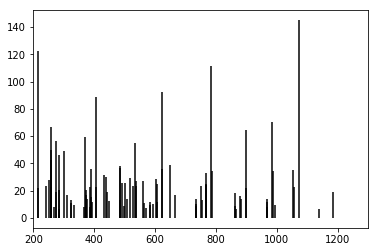

In [54]:
mz1 = [x[0] for x in mgf_new2[pep1key_new]['Peaks']]
int1 = [x[1] for x in mgf_new2[pep1key_new]['Peaks']]
plt.vlines(mz1, np.repeat(0, len(mz1)), int1)
plt.xlim(200,1300)

(200, 1300)

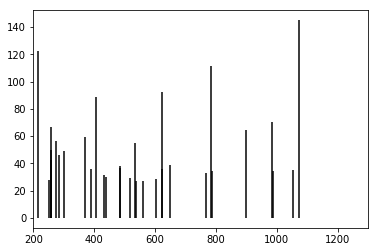

In [55]:
mz1 = [x[0] for x in mgf_new3[pep1key_new]['Peaks']]
int1 = [x[1] for x in mgf_new3[pep1key_new]['Peaks']]
plt.vlines(mz1, np.repeat(0, len(mz1)), int1)
plt.xlim(200,1300)

### TLSSLYSEMQK

In [42]:
i = 0
all_comps[i][0]

,215.139,258.145,275.171,371.193,389.203,406.212,484.231,486.264,535.254,622.286,623.29,649.327,768.323,785.35,786.353,898.434,985.466,986.469,1054.487,1072.498
0,0.7,0.2,0.2,0.2,0.1,0.4,0.1,0.1,0.1,0.4,0.1,0.1,0.1,0.6,0.1,0.2,0.2,0.1,0.1,1.0


In [43]:
all_comps[i][1]

,216.142,243.134,252.149,257.161,259.126,260.119,268.131,276.175,284.16,285.164,286.148,302.171,311.647,324.174,325.167,333.179,368.182,372.196,373.18,377.197,385.167,388.201,390.206,393.179,407.215,433.205,440.715,441.217,449.721,485.225,493.237,498.223,502.287,507.238,517.244,528.239,536.258,537.254,562.252,562.754,570.766,584.289,585.283,593.295,604.276,605.279,606.263,666.354,734.372,735.375,736.359,752.382,753.386,767.339,769.327,863.415,864.399,865.402,880.423,881.425,899.437,967.455,968.459,969.443,995.439,1055.471,1140.524,1185.582
0,0.0,0.0,0.0,0.1,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
all_comps[i][2]

,622.286,785.35,898.434,985.466,1072.498
0,0.4,0.6,0.2,0.3,1.0


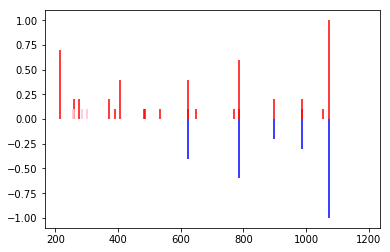

In [45]:
plot_spec(all_comps[i][0],'red')
plot_spec(all_comps[i][1],'pink')
plot_spec(-all_comps[i][2],'blue')

### IKPSESNVTILGR

In [10]:
print(all_comps[i])

[   215.121   221.145   232.140   314.165   328.198   345.224   413.903   \
0       0.2       0.2       0.2       0.1       0.1       0.7       0.1   

   458.309   459.312   559.356   560.360   577.812   586.817   643.349   \
0       0.7       0.1       1.0       0.1       0.1       0.1       0.1   

   658.425   738.378   756.389   772.468   855.457   1075.574  
0       0.1       0.1       0.3       0.1       0.1       0.1  ,    205.126   209.111   214.143   216.117   220.146   225.160   226.163   \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

   229.658   233.144   242.186   243.190   247.126   252.157   253.136   \
0       0.1       0.0       0.1       0.0       0.0       0.0       0.0   

   258.161   269.155   270.149   271.176   272.170   280.182   281.168   \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

   286.158   287.171   313.163   319.841   321.203   322.178   323.216   \
0       0.0       0.0       0.0       0.

In [6]:
i = 1
all_comps[i][0]

,215.121,221.145,232.14,314.165,328.198,345.224,413.903,458.309,459.312,559.356,560.36,577.812,586.817,643.349,658.425,738.378,756.389,772.468,855.457,1075.574
0,0.2,0.2,0.2,0.1,0.1,0.7,0.1,0.7,0.1,1.0,0.1,0.1,0.1,0.1,0.1,0.1,0.3,0.1,0.1,0.1


In [7]:
all_comps[i][1]

,205.126,209.111,214.143,216.117,220.146,225.16,226.163,229.658,233.144,242.186,243.19,247.126,252.157,253.136,258.161,269.155,270.149,271.176,272.17,280.182,281.168,286.158,287.171,313.163,319.841,321.203,322.178,323.216,324.182,324.845,327.214,329.201,329.716,339.239,340.242,346.228,351.198,353.193,353.855,357.201,359.196,369.693,377.732,378.726,386.206,387.239,389.22,391.547,391.882,395.23,407.899,409.245,410.248,419.719,422.242,426.271,427.274,428.232,430.253,434.245,440.298,441.282,442.285,470.243,478.756,485.769,486.763,495.276,526.293,527.286,529.285,530.279,535.298,537.303,538.287,538.792,541.346,542.33,543.333,555.314,556.317,582.835,587.319,591.84,611.346,624.335,625.319,626.323,640.414,641.398,642.346,650.865,659.428,739.362,740.365,754.457,755.441,757.392,773.471,837.446,838.431,839.434,841.489,842.492,843.476,859.5,938.494,939.478,940.482,956.505,957.508,970.532,971.516,988.542,989.546,1051.578,1052.562,1057.564,1069.589,1070.592,1076.578,1155.62
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
all_comps[i][2]

,458.309,559.356,586.817,658.425,756.389
0,0.7,1.0,0.1,0.1,0.3


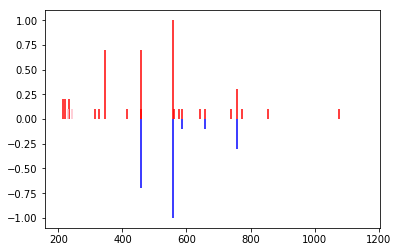

In [9]:
plot_spec(all_comps[i][0],'red')
plot_spec(all_comps[i][1],'pink')
plot_spec(-all_comps[i][2],'blue')

### SGSMSAYEMR

In [11]:
i = 2
all_comps[i][0]

,214.082,232.093,306.159,345.123,435.186,478.702,598.265,669.302,756.335,757.338,887.375,945.352,956.396,957.380,974.407,975.410,1013.418,1015.405,1031.428,1032.432
0,0.2,0.4,0.3,0.1,0.1,0.1,0.4,0.4,1.0,0.1,0.2,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0


In [12]:
all_comps[i][1]

,209.099,210.093,215.086,216.070,217.073,218.105,226.088,233.096,252.100,253.093,261.105,288.149,289.152,290.136,291.123,300.138,307.163,326.150,327.143,334.133,335.155,343.138,346.126,347.110,363.133,364.137,369.666,379.173,398.153,398.645,399.146,407.158,417.191,418.175,419.179,432.155,433.139,434.142,436.180,444.191,450.165,451.169,464.174,473.180,488.209,503.192,504.176,505.179,507.213,508.206,516.218,521.202,522.206,580.255,581.239,582.242,599.269,651.292,652.295,653.279,666.255,670.306,684.266,685.269,738.324,739.308,740.311,795.298,796.282,813.308,869.364,870.348,871.352,888.378,944.349
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
all_comps[i][2]

,288.149,289.129,299.636,306.159,345.123,363.133,369.666,432.155,435.202,478.702,503.192,507.213,598.265,669.302,738.325,739.305,756.335,887.375,974.407,1031.428
0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.0,0.3,0.4,0.0,0.0,1.0,0.2,0.1,0.0


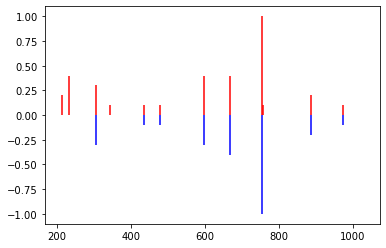

In [14]:
plot_spec(all_comps[i][0],'red')
plot_spec(all_comps[i][1],'pink')
plot_spec(-all_comps[i][2],'blue')

### VEPFLPGHYEVLDLKPNGK

In [15]:
i = 3
all_comps[i][0]

,229.112,415.230,642.016,656.409,683.350,706.880,735.391,771.436,774.912,783.917,796.411,831.454,840.459,884.520,913.994,962.520,983.588,1024.497,1112.631,1152.536
0,0.3,0.7,0.2,0.3,0.1,0.1,0.1,0.1,0.1,1.0,0.1,0.1,0.3,0.1,0.1,0.2,0.1,0.1,0.1,0.1


In [16]:
all_comps[i][1]

,200.107,204.134,205.138,208.119,211.108,212.111,213.095,214.133,223.123,228.118,230.122,237.123,242.130,252.141,258.151,263.161,264.154,272.166,285.152,287.154,287.816,289.842,293.157,294.167,300.167,301.170,302.154,308.160,309.144,310.148,318.177,319.181,320.697,323.193,326.171,327.174,328.869,333.187,334.180,342.170,362.199,371.204,377.216,378.210,385.185,386.222,386.723,390.526,397.219,398.203,399.207,416.233,417.545,419.899,420.562,423.883,426.237,430.227,431.220,433.758,434.752,439.232,439.734,442.764,455.229,456.232,457.216,465.586,465.920,471.924,473.239,484.286,484.921,485.255,490.596,492.298,492.800,493.582,493.916,512.250,512.752,516.944,520.764,522.947,525.314,526.298,527.302,531.277,537.280,543.325,544.328,547.814,548.316,554.973,557.321,560.642,568.313,569.297,570.300,574.303,574.637,576.781,579.979,585.285,586.324,587.327,604.324,606.326,606.988,609.999,612.329,626.306,629.346,629.847,634.819,636.340,638.398,639.382,640.386,644.340,645.003,650.344,663.675,664.010,665.366,666.369,667.353,669.351,679.026,682.356,684.380,685.030,691.863,698.367,698.869,722.387,723.371,724.375,726.386,727.379,740.398,741.401,749.376,753.425,754.409,755.413,772.439,797.405,805.417,859.446,860.430,860.961,866.509,867.493,868.497,869.966,877.457,885.523,905.480,909.477,909.979,953.515,954.016,965.578,966.499,967.565,975.012,984.592,994.517,995.511,1018.036,1022.509,1027.543,1040.520,1041.523,1094.620,1095.604,1096.608,1113.634,1153.539,1169.563,1170.566
0,0.0,0.1,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
all_comps[i][2]

,301.147,397.220,398.200,415.230,455.229,520.764,543.325,656.409,683.376,706.880,735.391,771.436,775.402,783.917,796.412,840.459,884.520,913.994,983.588,1112.631
0,0.1,0.1,0.1,0.6,0.1,0.1,0.1,0.2,0.1,0.1,0.1,0.1,0.1,1.0,0.1,0.3,0.1,0.1,0.1,0.1


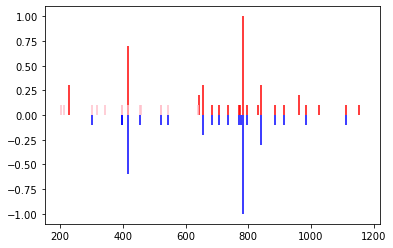

In [18]:
plot_spec(all_comps[i][0],'red')
plot_spec(all_comps[i][1],'pink')
plot_spec(-all_comps[i][2],'blue')

### IWNLSENSTSGSTQLVLR

In [19]:
i = 4
all_comps[i][0]

,272.180,288.203,300.171,301.174,387.271,414.214,500.355,501.359,612.391,628.414,629.417,725.362,729.462,816.494,817.497,873.515,874.519,960.547,961.551,1061.595
0,0.7,0.7,1.0,0.4,0.6,0.7,0.6,0.3,0.2,0.6,0.3,0.2,0.4,0.3,0.2,0.7,0.6,1.0,0.5,0.3


In [20]:
all_comps[i][1]

,200.107,204.139,204.802,208.112,210.143,238.150,242.168,243.121,244.160,248.462,248.797,251.183,255.147,256.141,264.152,267.161,270.192,271.196,273.171,281.136,282.160,283.163,284.147,286.168,289.206,292.178,298.663,305.705,308.170,309.484,310.146,315.178,315.822,321.188,343.166,343.829,348.867,354.871,356.229,357.223,363.184,364.178,365.235,369.261,370.245,371.248,372.177,377.878,383.882,388.275,391.184,391.847,396.203,397.522,398.190,400.237,409.252,415.217,416.220,420.195,420.857,421.896,426.198,428.256,429.250,437.261,454.212,458.900,463.722,464.576,472.264,473.229,480.777,483.329,484.332,488.245,493.921,496.564,502.902,510.271,511.274,514.246,522.296,522.798,525.278,525.940,527.298,528.301,531.301,534.258,540.596,557.762,558.254,563.292,565.812,566.314,567.281,569.295,573.285,575.319,586.273,587.266,595.278,596.319,597.303,598.306,605.304,610.404,611.407,614.330,615.333,623.827,625.318,625.653,630.281,630.782,631.839,639.296,681.306,687.355,689.819,696.360,696.862,711.451,712.435,713.439,726.346,727.349,730.465,730.871,731.864,740.378,743.372,744.376,745.335,753.347,753.849,787.905,788.406,796.418,796.920,798.483,799.467,800.884,801.877,839.405,840.389,841.392,850.418,851.412,853.439,855.505,856.489,857.492,858.419,915.965,926.437,927.421,928.424,938.467,942.537,943.521,944.524,945.451,946.981,1027.484,1028.488,1029.472,1043.584,1045.572,1062.598,1114.516,1115.520,1148.627,1149.630,1171.538,1173.525,1189.548,1190.552
0,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0.1,0.1,0.1,0.0,0.0,0.2,0.1,0.1,0.0,0.1,0.1,0.0,0.1,0.0,0.2,0.0,0.0,0.1,0.0,0.0,0.1,0.1,0.1,0.0,0.0,0.1,0.1,0.0,0.0,0.1,0.0,0.0,0.1,0.0,0.1,0.0,0.1,0.0,0.1,0.1,0.2,0.1,0.1,0.0,0.0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.0,0.0,0.1,0.0,0.1,0.2,0.0,0.0,0.1,0.0,0.0,0.0,0.1,0.0,0.1,0.0,0.0,0.2,0.1,0.1,0.1,0.1,0.0,0.1,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.1,0.0,0.1,0.2,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.0,0.0,0.0,0.1,0.1,0.0,0.0,0.1,0.1,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0.1,0.0,0.1,0.1,0.1,0.0,0.0,0.1,0.1,0.0,0.0,0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0


In [21]:
all_comps[i][2]

,271.173,288.203,300.171,314.711,356.230,387.271,400.236,414.214,483.325,500.355,514.246,527.298,611.384,628.414,725.362,729.462,816.494,873.515,960.547,1061.595
0,0.1,0.5,0.7,0.2,0.2,0.5,0.2,0.6,0.2,0.6,0.2,0.2,0.2,0.5,0.1,0.4,0.3,0.7,1.0,0.4


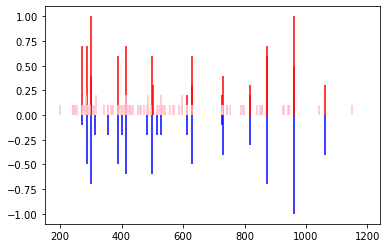

In [22]:
plot_spec(all_comps[i][0],'red')
plot_spec(all_comps[i][1],'pink')
plot_spec(-all_comps[i][2],'blue')

### WVTTASLLDYDTVAGADK

In [23]:
i = 5
all_comps[i][0]

,262.140,286.155,369.192,387.203,390.198,461.219,462.239,470.225,541.277,560.291,661.352,662.355,776.378,777.382,939.442,940.445,1054.469,1055.472,1167.553,1168.556
0,0.3,1.0,0.3,0.3,0.6,1.0,0.2,0.2,0.2,0.2,0.4,0.2,0.3,0.2,0.3,0.4,0.6,0.8,0.6,1.0


In [24]:
all_comps[i][1]

,222.116,223.110,231.121,236.125,244.129,245.133,246.117,263.143,268.144,269.128,270.132,271.142,272.152,280.147,281.157,287.158,315.150,316.150,317.154,322.174,323.168,324.165,331.179,333.177,334.180,370.176,371.179,372.188,373.191,374.175,380.180,388.206,389.195,391.202,428.234,437.249,443.225,444.209,445.212,471.224,472.227,485.256,486.249,488.250,489.254,494.261,519.225,528.240,542.280,543.264,544.281,559.287,561.307,567.289,575.275,576.268,584.280,624.301,625.294,628.309,629.293,630.296,632.309,633.306,641.324,643.341,644.325,645.328,646.320,647.323,674.825,676.326,684.332,711.343,720.358,724.359,725.353,741.393,742.377,743.380,758.368,759.352,760.407,761.867,768.883,770.882,788.388,789.382,797.895,812.401,821.406,833.414,854.477,855.461,861.433,862.427,872.488,881.420,882.414,890.425,921.431,922.415,970.507,971.491,987.515,988.518,1036.458,1037.442,1038.446,1132.567,1133.551,1134.555,1149.542,1150.526,1151.530
0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.0,0.2,0.1,0.0,0.1,0.0,0.0,0.2,0.1,0.1,0.0,0.0,0.0,0.1,0.0,0.1,0.0,0.2,0.1,0.0,0.1,0.0,0.0,0.1,0.0,0.1,0.1,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.1,0.0,0.0,0.1,0.1,0.1,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0.1,0.0,0.0,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
all_comps[i][2]

,262.140,269.125,286.155,333.177,369.193,370.173,373.168,387.203,390.198,461.235,470.225,541.277,559.287,560.304,628.310,661.352,776.378,939.442,1054.469,1167.553
0,0.2,0.2,1.0,0.2,0.2,0.2,0.1,0.4,0.6,1.0,0.2,0.2,0.1,0.3,0.1,0.4,0.3,0.4,0.8,0.6


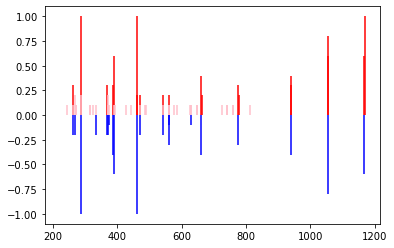

In [26]:
plot_spec(all_comps[i][0],'red')
plot_spec(all_comps[i][1],'pink')
plot_spec(-all_comps[i][2],'blue')

### LLYDLADQLHAAVGASR

In [27]:
i = 6
all_comps[i][0]

,211.152,227.175,315.178,390.210,489.242,505.266,506.269,560.315,631.352,654.837,712.368,768.400,793.900,881.495,1009.554,1045.556,1124.581,1125.584,1182.615,1195.618
0,0.2,0.6,0.3,0.8,0.2,0.5,0.2,0.5,0.6,0.2,0.2,1.0,0.4,0.4,0.5,0.1,0.5,0.1,0.2,0.6


In [28]:
all_comps[i][1]

,209.165,210.149,228.179,237.131,244.131,245.124,246.128,253.136,262.151,263.154,281.163,301.165,308.168,310.180,316.181,317.165,333.188,334.191,337.185,345.197,372.199,373.212,374.216,384.709,391.213,394.197,432.246,433.240,441.251,458.227,471.267,472.251,487.255,488.239,496.767,514.277,523.282,542.305,543.289,561.318,562.794,583.298,589.307,590.301,592.313,598.313,600.339,601.323,602.327,613.342,614.326,615.329,618.325,619.318,632.356,646.341,653.843,655.356,663.350,671.376,673.364,689.387,690.390,703.363,703.855,712.884,740.893,751.385,752.388,769.414,776.412,776.914,785.386,786.403,794.401,804.414,810.923,820.430,841.436,850.442,850.943,863.485,864.469,865.472,882.499,915.446,932.472,991.543,992.527,993.531,1010.557,1027.546,1028.530,1106.570,1107.554,1178.591
0,0.0,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
all_comps[i][2]

,262.151,390.210,489.278,505.281,560.315,598.313,618.350,631.352,654.855,712.383,768.411,793.900,804.414,850.442,881.495,932.472,992.524,1009.554,1124.581,1182.615
0,0.2,0.7,0.3,0.5,0.5,0.2,0.1,0.6,0.3,0.2,1.0,0.4,0.1,0.1,0.3,0.1,0.1,0.4,0.6,0.1


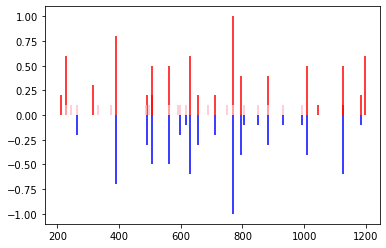

In [30]:
plot_spec(all_comps[i][0],'red')
plot_spec(all_comps[i][1],'pink')
plot_spec(-all_comps[i][2],'blue')

### LHFLAPSEEDEMNDKK

In [31]:
i = 7
all_comps[i][0]

,234.124,251.150,275.208,380.208,398.219,504.245,511.303,582.340,635.318,764.361,878.896,879.444,880.391,886.401,895.407,1024.510,1137.473,1138.476,1139.537,1140.540
0,0.2,1.0,0.1,0.1,0.9,0.1,0.2,0.4,0.1,0.1,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0


In [32]:
all_comps[i][1]

,233.140,244.139,257.197,259.185,283.662,310.151,331.195,332.188,372.224,374.171,382.684,390.235,399.222,487.251,493.292,560.736,564.329,583.343,604.744,612.756,636.321,661.282,662.385,679.393,688.288,692.302,747.334,749.417,766.425,815.350,817.872,861.377
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
all_comps[i][2]

,234.120,251.150,275.208,390.235,398.219,486.268,504.278,511.303,582.340,635.318,661.282,747.331,764.361,818.362,879.388,895.467,1008.430,1024.510,1137.473,1139.537
0,0.3,1.0,0.1,0.0,0.8,0.0,0.1,0.2,0.5,0.1,0.0,0.0,0.1,0.0,0.1,0.1,0.0,0.0,0.0,0.0


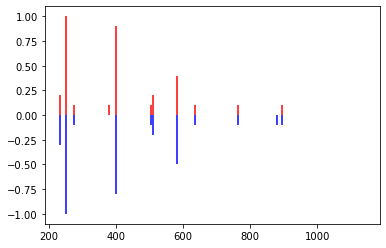

In [34]:
plot_spec(all_comps[i][0],'red')
plot_spec(all_comps[i][1],'pink')
plot_spec(-all_comps[i][2],'blue')